In [1]:
!pip install pandas

  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    --------------------------------------- 0.3/11.3 MB ? eta -:--:--
    -----------------------

In [2]:
!pip install -r requirements.txt

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.5.1-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
  Using cached distro-1.9.0-py3-none-any.whl.metadata (6.8 kB)
  Using cached httpx-0.28.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached pydantic-2.11.7-py3-none-any.whl.metadata (67 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached idna-3.10-py3-none-any.whl.metadata (10 kB)
  Using cached httpcore-1.0.9-py3-none-any.whl.metadata (21 kB)
  Using cached h11-0.16.0-py3-none-any.whl.metadata (8.3 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached python_dotenv-1.1.1-py3-none-any.whl.metadata (24 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-

### 1. Import Dependencies

In [27]:
import os
import seaborn as sns
from enum import Enum
from pydantic import BaseModel
import numpy as np # alias
import openai, groq
import pandas as pd # alias
from dotenv import load_dotenv

load_dotenv()

True

In [6]:
os.getcwd()

'd:\\MyWork\\ZuuML\\EDA-for-Churn-Modelling'

### 2. Basic Information

In [8]:
df = pd.read_csv("data/raw/ChurnModelling.csv")
df.head(10)

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,NaN,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Carol,Wilson,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
7,8,15656148,Grace,Wilson,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
8,9,15792365,Hank,Jones,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0
9,10,15592389,Eva,Wilson,684,France,Male,27.0,2,134603.88,1,1,1,71725.73,0


In [10]:
df.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                600
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

### 3. Handle Missing Values

#### 3.1 Deletion

**axis = 1** -> check each column and drop if atleast 1 null value consists of <br/>
**axis = 0** -> check each row and drop if atleast 1 null value consists of 

In [11]:
df_cp = df.copy()
df_cp = df_cp.dropna(axis=0) 
df_cp

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.0,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,5,15737888,Grace,Miller,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Jack,Smith,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Grace,Garcia,771,France,Male,39.0,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Jack,Garcia,516,France,Male,35.0,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Carol,Johnson,709,France,Female,36.0,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Jack,Garcia,772,Germany,Male,42.0,3,75075.31,2,1,0,92888.52,1


In [12]:
10000 - 9337

663

#### 3.2 Imputation

##### 3.2.1 Age

In [13]:
mean = df['Age'].mean()
median = df['Age'].median()
mean = round(mean, 2)

print(f"Mean | Age : {mean}")
print(f"Median | Age : {median}")

Mean | Age : 38.91
Median | Age : 37.0


<Axes: xlabel='Age', ylabel='Count'>

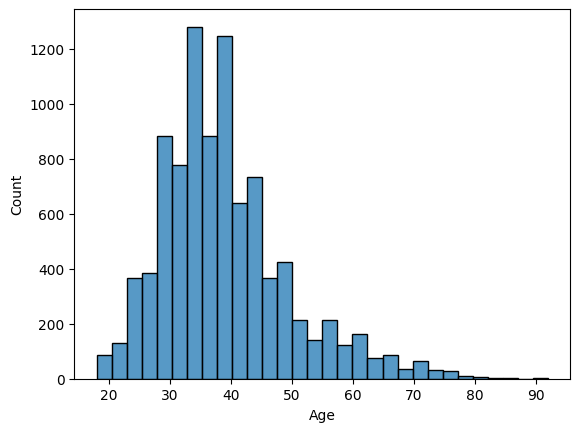

In [15]:
sns.histplot(df['Age'], bins=30)

In [16]:
df_impute = df.copy()

In [17]:
df_impute.loc[:, 'Age'] = df_impute['Age'].fillna(mean) # : means consider entire row and then here, the Age column
df_impute.head()

,RowNumber,CustomerId,Firstname,Lastname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Grace,Williams,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,2,15647311,David,Jones,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Hank,Williams,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Eva,Taylor,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,5,15737888,Grace,Miller,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [18]:
# get null values
df_impute.isnull().sum()

RowNumber            0
CustomerId           0
Firstname            7
Lastname             6
CreditScore          0
Geography            0
Gender             108
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

##### 3.2.2 Gender

In [ ]:
class Gender(str, Enum):
    MALE = "Male"
    FEMALE = "Female"

class GenderPrediction(BaseModel):
    firstname: str 
    lastname: str
    pred_gender: Gender

def predict_gender(
                firstname: str,
                lastname: str
                ):
    prompt = f"""
                What is the most likely gender (Male or Female) for someone with the first name '{firstname}'
                and last name '{lastname}' ?

                Your response only consists of one word: Male or Female
                """
    
    response = groq.Groq().chat.completions.create(
                                                    model="llama-3.3-70b-versatile",
                                                    messages=[{
                                                                "role": "user",
                                                                "content": prompt
                                                            }]
                                                    )
    predicted_gender = response.choices[0].message.content.strip()
    prediction = GenderPrediction(
                                firstname=firstname ,
                                lastname=lastname,
                                pred_gender=predicted_gender
                                )
    return prediction.pred_gender

In [29]:
predict_gender("Isuru", "Alagiyawanna")

<Gender.MALE: 'Male'>

In [30]:
predict_gender("Judith", "Fernando")

<Gender.FEMALE: 'Female'>

In [37]:
missing_gender_index = df_impute['Gender'].isnull()
for idx in df_impute[missing_gender_index].index:
    first_name = df_impute.loc[idx, 'Firstname']
    last_name = df_impute.loc[idx, 'Lastname']
    gender = predict_gender(first_name, last_name)
    
    if gender:
        df_impute.loc[idx, 'Gender'] = gender
        print(f"{first_name} {last_name} : {gender}")
    else:
        print(f"{first_name} {last_name} : No Gender Detected")

Eva Wilson : Gender.FEMALE
Ivy Johnson : Gender.FEMALE
David Taylor : Gender.MALE
Frank Davis : Gender.MALE
Jack Wilson : Gender.MALE
David Miller : Gender.MALE
Eva Taylor : Gender.FEMALE
Grace Johnson : Gender.FEMALE
Hank Miller : Gender.MALE
Frank Williams : Gender.MALE
Alice Davis : Gender.FEMALE
Alice Brown : Gender.FEMALE
Alice Garcia : Gender.FEMALE
Bob Jones : Gender.MALE
Jack Davis : Gender.MALE
Grace Williams : Gender.FEMALE
Ivy Jones : Gender.FEMALE
David Smith : Gender.MALE
David Miller : Gender.MALE
Eva Williams : Gender.FEMALE
Frank Garcia : Gender.MALE
Alice Wilson : Gender.FEMALE
Carol Jones : Gender.FEMALE
Hank Davis : Gender.MALE
Ivy Williams : Gender.FEMALE
Hank Smith : Gender.MALE
Ivy Jones : Gender.FEMALE
Alice Brown : Gender.FEMALE
Eva Taylor : Gender.FEMALE
Carol Williams : Gender.FEMALE
Jack Williams : Gender.MALE
Ivy Brown : Gender.FEMALE
David Brown : Gender.MALE
Bob Smith : Gender.MALE
Frank Wilson : Gender.MALE
Bob Williams : Gender.MALE
Ivy Johnson : Gender.

In [38]:
# get null values
df_impute.isnull().sum()

RowNumber          0
CustomerId         0
Firstname          7
Lastname           6
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [39]:
df_impute = df_impute.drop(
                            columns=[
                                    'RowNumber',
                                    'CustomerId',
                                    'Firstname',
                                    'Lastname'
                                    ]
                            )
df_impute.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.00,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41.00,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42.00,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,38.91,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43.00,2,125510.82,1,1,1,79084.10,0


In [40]:
# get null values
df_impute.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [41]:
df_impute.to_csv(
                'data/processed/ChurnModelling_Missing_Values_Handled.csv', 
                index=False
                )